In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm

In [159]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [160]:
df = pd.concat([df_train,df_test])

In [161]:
df.shape

(2919, 81)

Primeiro - Lidar com os outliers


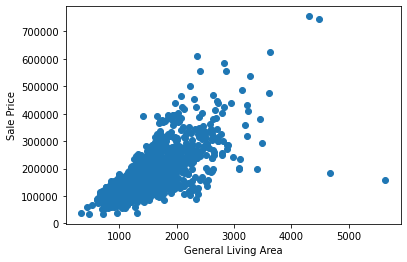

In [162]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.xlabel('General Living Area')
plt.ylabel('Sale Price')
plt.show()

Percebe-se dois outliers, onde a area da casa é grande mas o preço não, portanto é importante remover esses dois casos do dataframe de treino

In [163]:
df_train  = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index)

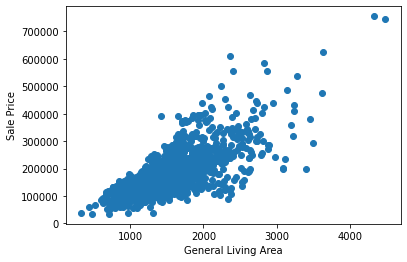

In [164]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.xlabel('General Living Area')
plt.ylabel('Sale Price')
plt.show()

2 - estudando a variável Sale Price

<ipython-input-165-7254e7006422>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

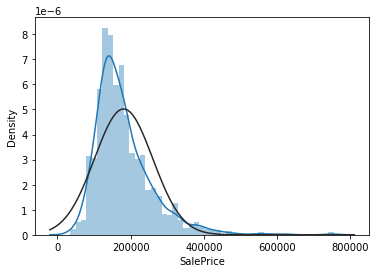

In [165]:
sns.distplot(df_train['SalePrice'], fit=norm)

Como se percebe a variável SalePrice(linha azul) não tem uma distribuicão normal(linha preta), distribuição a qual ajuda no modelo de previsão


In [166]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

<ipython-input-167-7254e7006422>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

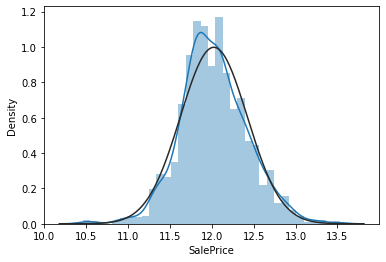

In [167]:
sns.distplot(df_train['SalePrice'], fit=norm)

3 - preparando o data set para o modelo de ml


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [120]:
df['PoolQC'] = df['PoolQC'].fillna('None') # NA na variável significa sem piscina.
df['MiscFeature'] = df['MiscFeature'].fillna('None') # Na na variávle significas sem MiscFearture
df['Alley'] = df['Alley'].fillna('None') # mesma ideia
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [121]:
#[LotFrontage] - tamanho da frente do lote, usarei a media do bairro para os valores Na

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [122]:
# substituindo valores com 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
  df[col] = df[col].fillna(0)

In [123]:
# substituindo valores com None
for col in ('GarageType', 'GarageFinish', 'GarageCond', 'GarageQual','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
  df[col] = df[col].fillna('None')

In [124]:
#substituindo os valores Na pelo valor mais comum da coluna
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [125]:
for col in ('Electrical', 'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual', 'Functional'):
  df[col] = df[col].fillna(df[col].mode()[0])

In [126]:
df = df.drop('Utilities',axis=1)

In [127]:
df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']  # criando uma nova variável do total de metros quadrados (porão, 1 andar, 2 andar) 

In [128]:
# nenhuma variável com Na.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [129]:
# transformando as colunas 'object' em numeros para fazer o modelo de treinamento
lb = LabelEncoder()


#lista com todas as colunas de tipo objeto
objList = df.select_dtypes(include = "object").columns

#transformando em 
for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))
 

In [130]:
df.info()  # percebe-se que todas colunas estão como numéricas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   int64  
 12  Condition1     2919 non-null   int64  
 13  Condition2     2919 non-null   int64  
 14  BldgType       2919 non-null   int64  
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [131]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [132]:
#dividindo o data frame em treino e teste
df_train = df.loc[df['Id'] < 1461]
df_test = df.loc[df['Id'] >= 1461]

In [133]:
df_train.shape

(1460, 81)

Modelo de Previsão esolhido = XGBoost

In [134]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [135]:
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice', axis=1)

In [136]:
model_xgb.fit(X_train, y_train)

[21:09:29] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4603, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0468, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             n_estimators=2200, n_jobs=None, nthread=-1, num_parallel_tree=None,
             predictor=None, ...)

In [137]:
xgb_train_pred = model_xgb.predict(X_train)

In [151]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [152]:
print(rmsle(y_train,xgb_train_pred))

3383.9443052191396


Como se da para perceber pelo gráfico, o modelo de previsão ficou bem próximo da realidade 

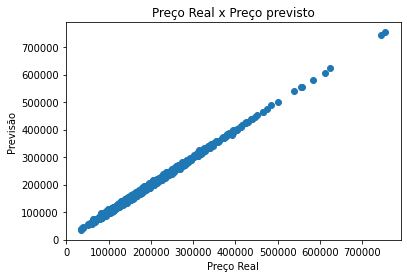

In [153]:
plt.scatter(y_train, xgb_train_pred)

plt.xlabel('Preço Real')
plt.ylabel("Previsão")
plt.title("Preço Real x Preço previsto")
plt.show()

In [139]:
xgb_test_pred = model_xgb.predict(X_test)

In [140]:
sub = pd.read_csv('sample_submission.csv')

sub['SalePrice'] = xgb_test_pred

from google.colab import files
sub.to_csv('output.csv', encoding = 'utf-8-sig', index=False) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

O data frame de teste foi ficou no top 20% de nota na competição do kaggle

